### *Run below mentioned Commands in a code cell if these packages are not available in your environment*
* ! pip install pandas
* ! pip install matplotlib
* ! pip install os
* ! pip install datetime

### *Loading Libraries*

In [307]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

#### Import Sales Data

In [308]:
xlsx = pd.ExcelFile('Sales-Data.xlsx')
sheet_names = xlsx.sheet_names
sheet_names

['Customer-Base', 'Sales-Data']

In [309]:
sales_data = pd.read_excel('Sales-Data.xlsx', sheet_name= 'Sales-Data')
customer_base = pd.read_excel('Sales-Data.xlsx', sheet_name= 'Customer-Base')
display(sales_data.head(), customer_base.head())


,InvoiceDate,InvoiceID,CustomerID,InvoiceValue
0,2022-01-01,DYSMJ47747,WNYQN5037,85
1,2022-01-01,JDOBV42881,GJMJI5215,87
2,2022-01-01,IWATI93376,AWXSL7355,76
3,2022-01-01,BYIGR33509,TTPXB4921,56
4,2022-01-01,KEQKA35598,WQYYR7437,84


,ID,CID,Gender,Age,PinCode
0,1,NCHFA9510,M,31,201303
1,2,BUUVH1506,M,33,201301
2,3,DYWQP6900,F,34,201302
3,4,DFQSR6753,M,41,201303
4,5,LZIEQ1426,M,38,201301


In [310]:
display(sales_data.shape)
master = sales_data.merge(customer_base, how = 'left', left_on = 'CustomerID', right_on= 'CID')
display(master.shape)
master.head()

(74988, 4)

(74988, 9)

,InvoiceDate,InvoiceID,CustomerID,InvoiceValue,ID,CID,Gender,Age,PinCode
0,2022-01-01,DYSMJ47747,WNYQN5037,85,20,WNYQN5037,M,26,201303
1,2022-01-01,JDOBV42881,GJMJI5215,87,96,GJMJI5215,M,50,201305
2,2022-01-01,IWATI93376,AWXSL7355,76,25,AWXSL7355,M,41,201305
3,2022-01-01,BYIGR33509,TTPXB4921,56,19,TTPXB4921,F,26,201301
4,2022-01-01,KEQKA35598,WQYYR7437,84,55,WQYYR7437,M,42,201302


In [311]:
### Which day of the year company made maximum revenue?
daily_sales = master.groupby('InvoiceDate').aggregate(daily_Sale = ('InvoiceValue', sum)).reset_index()
maximumsale = daily_sales.daily_Sale.max()
display(maximumsale)
daily_sales[(daily_sales['daily_Sale'] == maximumsale)]

90960

,InvoiceDate,daily_Sale
352,2022-12-19,90960


In [312]:
### What is mean sale per day?
import numpy as np
mean_sales = master.groupby('InvoiceDate').aggregate(Daily_Sale = ('InvoiceValue', np.mean)).reset_index()
mean_sales.head()

,InvoiceDate,Daily_Sale
0,2022-01-01,53.266055
1,2022-01-02,52.125000
2,2022-01-03,55.606061
3,2022-01-04,51.000000
4,2022-01-05,55.417840


In [313]:
### Organization want to implement a new HR policy in which Zone Manager (Zip is considered as Zone) can grant leaves to employee when business inflow is a bit low. What are those days in different months?
master['Month'] = master.InvoiceDate.apply(lambda x : x.strftime('%b'))
master['Day'] = master.InvoiceDate.apply(lambda x : x.strftime('%a'))

minimum_sale_by_day = master.pivot_table(index='Month', 
                                            columns='Day', 
                                            values=['InvoiceValue'], 
                                            aggfunc={'InvoiceValue': 'sum'}, 
                                            fill_value=0)
minimum_sale_by_day


InvoiceValue                                                
Day            Fri     Mon     Sat     Sun     Thu     Tue     Wed
Month                                                             
Apr         100554   79360   93496   80283   75797   77225   77083
Aug         156695  188531  167863  152387  152097  175489  181067
Dec         387116  318463  381463  296884  380098  309909  318326
Feb          53508   56637   58529   56361   58267   55768   56869
Jan          44723   57581   57215   55904   44921   48480   44981
Jul         165661  133568  159309  166883  129177  136400  130580
Jun         109540   95965  107511  101060  129472   97150  130250
Mar          68464   67765   72951   70122   82180   83532   88454
May          92013  105556   96971  116875   89911  112492   84053
Nov         252587  281378  263839  272728  278956  312648  333469
Oct         221061  273707  260160  271276  214855  207130  217979
Sep         222501  171839  185091  174669  223436  185648  177120

In [314]:
### What is Median invoice genration rate per month?
invoice_generation = master.groupby('InvoiceDate').aggregate(Daily_Count = ('InvoiceValue', 'count')).reset_index()
display(invoice_generation['Daily_Count'].median(), invoice_generation['Daily_Count'].mean())

206.0

205.44657534246576

In [315]:
### what is average invoice value in 2022? What is trend over month-on-month?
display(master.InvoiceValue.mean())
average_Revenue_generation = master.groupby('InvoiceDate').aggregate(Daily_Count = ('InvoiceValue', np.mean)).reset_index()
average_Revenue_generation.head()

172.372539606337

,InvoiceDate,Daily_Count
0,2022-01-01,53.266055
1,2022-01-02,52.125000
2,2022-01-03,55.606061
3,2022-01-04,51.000000
4,2022-01-05,55.417840


In [316]:
master.head()

,InvoiceDate,InvoiceID,CustomerID,InvoiceValue,ID,CID,Gender,Age,PinCode,Month,Day
0,2022-01-01,DYSMJ47747,WNYQN5037,85,20,WNYQN5037,M,26,201303,Jan,Sat
1,2022-01-01,JDOBV42881,GJMJI5215,87,96,GJMJI5215,M,50,201305,Jan,Sat
2,2022-01-01,IWATI93376,AWXSL7355,76,25,AWXSL7355,M,41,201305,Jan,Sat
3,2022-01-01,BYIGR33509,TTPXB4921,56,19,TTPXB4921,F,26,201301,Jan,Sat
4,2022-01-01,KEQKA35598,WQYYR7437,84,55,WQYYR7437,M,42,201302,Jan,Sat


In [317]:
## Do the same pincode have best revenue/invoice?
June_Sales = master[master['Month'] == 'Jun'].groupby(['Month', 'PinCode']).aggregate(June_Sale = ('InvoiceValue', np.sum), 
                                                                         June_invoices = ('InvoiceDate', len)).reset_index()

June_Sales['RevenuePerInvoice'] = June_Sales['June_Sale']/June_Sales['June_invoices'] 
June_Sales['PinCode'] = June_Sales.PinCode.apply(lambda x: str(x))

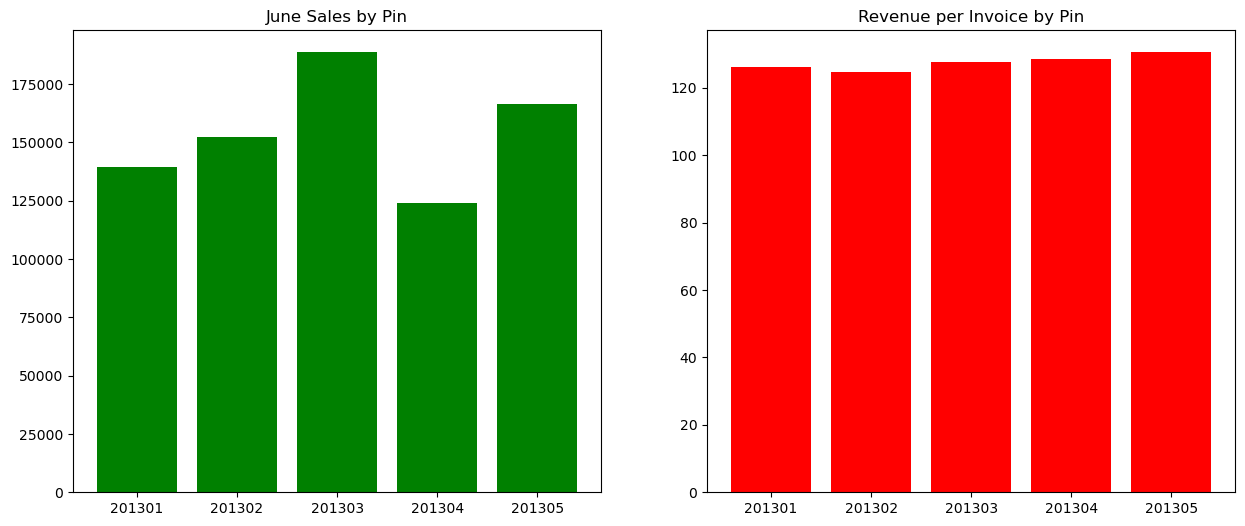

In [318]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].bar(June_Sales['PinCode'], June_Sales['June_Sale'], color='g')
axs[0].set_title('June Sales by Pin')

axs[1].bar(June_Sales['PinCode'], June_Sales['RevenuePerInvoice'], color='r')
axs[1].set_title('Revenue per Invoice by Pin')

plt.show()


In [319]:
# There was a print media campaign rolled-out during 23-May-2023 to 31-May-2023. did this made any impact on sale? Consider sale of April and June 2023 for analysis.
post_pmc = master[master['Month'] == 'Jun'].groupby(['PinCode']).aggregate(post_pmc_sale = ('InvoiceValue', np.sum)).reset_index()
pre_pmc = master[master['Month'] == 'Apr'].groupby(['PinCode']).aggregate(pre_pmc_sale = ('InvoiceValue', np.sum)).reset_index()

performance = pre_pmc.merge(post_pmc, how= "left", on='PinCode')
performance

,PinCode,pre_pmc_sale,post_pmc_sale
0,201301,108315,139269
1,201302,120807,152309
2,201303,142851,188645
3,201304,97462,124228
4,201305,114363,166497


In [320]:
from scipy import stats

# Perform the paired T-test
t_statistic, p_value = stats.ttest_rel(performance.pre_pmc_sale, performance.post_pmc_sale)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -7.664638474290842
P-value: 0.0015575424619567444


In [321]:
# There was a Electronic media campaign rolled-out during 20-Feb-2023 to 28-Feb-2023. did this made any impact on sale? Consider sale of January and March-April 2023 for analysis
post_emc = master[master['Month'].isin(['Mar', 'Apr'])].groupby(['PinCode']).aggregate(post_emc_sale = ('InvoiceValue', np.sum)).reset_index()
pre_emc = master[master['Month'] == 'Jan'].groupby(['PinCode']).aggregate(pre_emc_sale = ('InvoiceValue', np.sum)).reset_index()

performance = pre_emc.merge(post_emc, how= "left", on='PinCode')
performance

,PinCode,pre_emc_sale,post_emc_sale
0,201301,64926,204400
1,201302,69530,226836
2,201303,90721,273791
3,201304,55096,186587
4,201305,73532,225652


In [322]:
# Perform the paired T-test
t_statistic, p_value = stats.ttest_rel(performance.pre_emc_sale, performance.post_emc_sale)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -17.241324449647742
P-value: 6.640352969380292e-05


In [323]:
# There was a Social media campaign rolled-out during 01-Jul-2023 to 31-Jul-2023. did this made any impact on sale? Consider sale of April and June 2023 for analysis.
post_smc = master[master['Month'] == 'Aug'].groupby(['PinCode']).aggregate(post_smc_sale = ('InvoiceValue', np.sum)).reset_index()
pre_smc = master[master['Month'] == 'Jun'].groupby(['PinCode']).aggregate(pre_smc_sale = ('InvoiceValue', np.sum)).reset_index()

performance = pre_smc.merge(post_smc, how= "left", on='PinCode')
performance

,PinCode,pre_smc_sale,post_smc_sale
0,201301,139269,209557
1,201302,152309,230208
2,201303,188645,284152
3,201304,124228,185070
4,201305,166497,265142


In [324]:
# Perform the paired T-test
t_statistic, p_value = stats.ttest_rel(performance.pre_smc_sale, performance.post_smc_sale)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -11.119085988564601
P-value: 0.0003722306799915598


In [325]:
# Which campaign made the best and least impact on Sale?
smc_performance = pre_smc.merge(post_smc, how= "left", on='PinCode')
emc_performance = pre_emc.merge(post_emc, how= "left", on='PinCode')
pmc_performance = pre_pmc.merge(post_pmc, how= "left", on='PinCode')

# Analysis at PinCode Level
smc_performance['smc_Impact'] = (smc_performance['post_smc_sale'] - smc_performance['pre_smc_sale'])/smc_performance['pre_smc_sale']
emc_performance['emc_Impact'] = (emc_performance['post_emc_sale'] - emc_performance['pre_emc_sale'])/emc_performance['pre_emc_sale']
pmc_performance['pmc_Impact'] = (pmc_performance['post_pmc_sale'] - pmc_performance['pre_pmc_sale'])/pmc_performance['pre_pmc_sale']

display(smc_performance.sort_values(by = ['smc_Impact'],  ascending= False))
display(emc_performance.sort_values(by = ['emc_Impact'],  ascending= False))
display(pmc_performance.sort_values(by = ['pmc_Impact'],  ascending= False))



,PinCode,pre_smc_sale,post_smc_sale,smc_Impact
4,201305,166497,265142,0.592473
1,201302,152309,230208,0.511454
2,201303,188645,284152,0.506279
0,201301,139269,209557,0.504692
3,201304,124228,185070,0.489761


,PinCode,pre_emc_sale,post_emc_sale,emc_Impact
3,201304,55096,186587,2.386580
1,201302,69530,226836,2.262419
0,201301,64926,204400,2.148199
4,201305,73532,225652,2.068759
2,201303,90721,273791,2.017945


,PinCode,pre_pmc_sale,post_pmc_sale,pmc_Impact
4,201305,114363,166497,0.455864
2,201303,142851,188645,0.320572
0,201301,108315,139269,0.285778
3,201304,97462,124228,0.274630
1,201302,120807,152309,0.260763


In [326]:
# Over All Campaign Effectiveness
smc_impact = (smc_performance.post_smc_sale.sum() - smc_performance.pre_smc_sale.sum())/smc_performance.pre_smc_sale.sum()
emc_impact = (emc_performance.post_emc_sale.sum() - emc_performance.pre_emc_sale.sum())/emc_performance.pre_emc_sale.sum()
pmc_impact = (pmc_performance.post_pmc_sale.sum() - pmc_performance.pre_pmc_sale.sum())/pmc_performance.pre_pmc_sale.sum()

display(smc_impact, emc_impact, pmc_impact)

0.5229678266238449

2.157858142196973

0.32057321196715305

In [327]:
### Import Customer Data
customer_base = pd.read_excel('Sales-Data.xlsx', sheet_name= 'Customer-Base')


In [328]:
### Which pincode have maximum number of customers?
filter_columns = ['PinCode', 'Gender']
customer_distribution = customer_base[filter_columns].pivot_table(index='PinCode', 
                                            columns='Gender',
                                            values=['Gender'], 
                                            aggfunc={'Gender': 'count'}, 
                                            fill_value=0)
customer_distribution

Gender    
Gender       F   M
PinCode           
201301       2  16
201302       4  16
201303       5  20
201304       5  11
201305       5  16

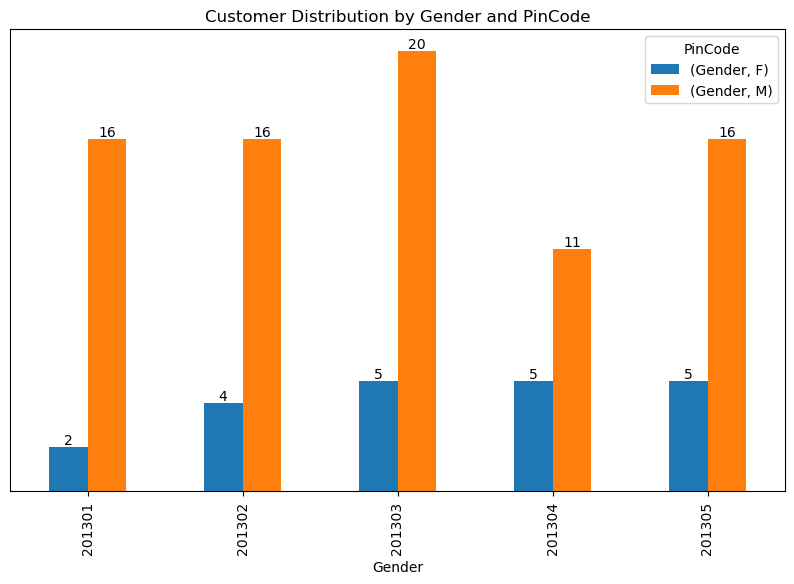

In [329]:

plt.rcParams['figure.figsize'] = [10, 6] 

# Create a bar plot
ax = customer_distribution.plot(kind='bar', stacked=False)

# Customize the plot
ax.set_xlabel('Gender')
ax.set_title('Customer Distribution by Gender and PinCode')
ax.legend(title='PinCode')

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Set plot labels and title
ax.set_xlabel
ax.set_yticks([])


# Show the plot
plt.show()

In [330]:
#  What is average age of female population in pincode with maximum male customers?
customer_base[(customer_base['PinCode'] == 201303) & (customer_base['Gender'] == 'F')]
customer_base[(customer_base['PinCode'] == 201303) & (customer_base['Gender'] == 'F')].Age.min()

20

,median_age
Gender,
F,45.0
M,39.0


'U Statistic: 722.5'

'P-Value: 0.36710514988810294'

'There is no statistically significant difference between the samples.'

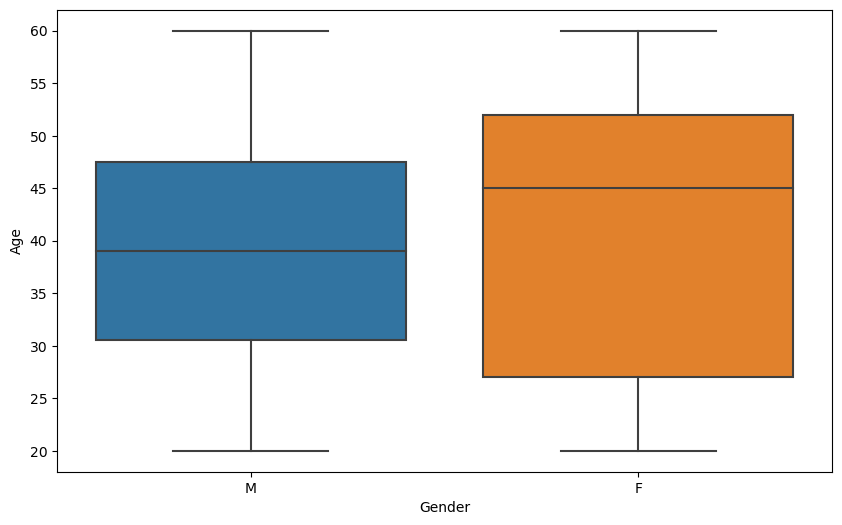

In [331]:
# do male and female have equal average age?

#Descriptive Approach
display(customer_base.groupby('Gender').aggregate(median_age = ('Age', np.median)))

# Visual Approach
import seaborn as sns
sns.boxplot(x='Gender', y='Age', data=customer_base)

# Statistical Inference Validation
import scipy.stats as stats
male_customer_age = customer_base[customer_base['Gender'] == 'M'].Age.to_list()
female_customer_age = customer_base[customer_base['Gender'] == 'F'].Age.to_list()
statistic, p_value = stats.mannwhitneyu(male_customer_age, female_customer_age, alternative='two-sided')

display(f"U Statistic: {statistic}")
display(f"P-Value: {p_value}")

if p_value < 0.05:
    display("The difference between the samples is statistically significant.")
else:
    display("There is no statistically significant difference between the samples.")


In [332]:
# do male and female have equal average age?

#Descriptive Approach
display(customer_base.groupby('Gender').aggregate(median_age = ('Age', np.mean)))

# Statistical Inference Validation
import scipy.stats as stats
male_customer_age = customer_base[customer_base['Gender'] == 'M'].Age.to_list()
female_customer_age = customer_base[customer_base['Gender'] == 'F'].Age.to_list()
t_statistic, p_value = stats.ttest_ind(male_customer_age, female_customer_age)


print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("There is no statistically significant difference between the groups.")


,median_age
Gender,
F,41.47619
M,39.00000


T-Statistic: -0.8941292881923165
P-Value: 0.37344336735896166
There is no statistically significant difference between the groups.


In [333]:
# which pincode have minimum/maximum average difference of age?
max_age = customer_base.groupby(['PinCode']).aggregate(Maximum_age = ('Age', np.max)).reset_index()
min_age = customer_base.groupby(['PinCode']).aggregate(minimum_age = ('Age', np.min)).reset_index()
age_difference = max_age.merge(min_age, how = 'left', on='PinCode')
age_difference['Age_Difference'] = age_difference['Maximum_age'] - age_difference['minimum_age']
age_difference.sort_values(by = 'Age_Difference', ascending= False)


,PinCode,Maximum_age,minimum_age,Age_Difference
2,201303,60,20,40
4,201305,60,20,40
3,201304,59,20,39
0,201301,56,20,36
1,201302,60,24,36


In [334]:
# which pincode have minimum/maximum average difference of age?
avg_age = customer_base.groupby(['PinCode']).aggregate(avg_custoemr_age = ('Age', np.mean)).reset_index()
avg_age.sort_values(by = 'avg_custoemr_age', ascending=False)

,PinCode,avg_custoemr_age
1,201302,43.800000
3,201304,39.750000
4,201305,38.380952
2,201303,38.200000
0,201301,37.722222


In [335]:
master.head()

,InvoiceDate,InvoiceID,CustomerID,InvoiceValue,ID,CID,Gender,Age,PinCode,Month,Day
0,2022-01-01,DYSMJ47747,WNYQN5037,85,20,WNYQN5037,M,26,201303,Jan,Sat
1,2022-01-01,JDOBV42881,GJMJI5215,87,96,GJMJI5215,M,50,201305,Jan,Sat
2,2022-01-01,IWATI93376,AWXSL7355,76,25,AWXSL7355,M,41,201305,Jan,Sat
3,2022-01-01,BYIGR33509,TTPXB4921,56,19,TTPXB4921,F,26,201301,Jan,Sat
4,2022-01-01,KEQKA35598,WQYYR7437,84,55,WQYYR7437,M,42,201302,Jan,Sat


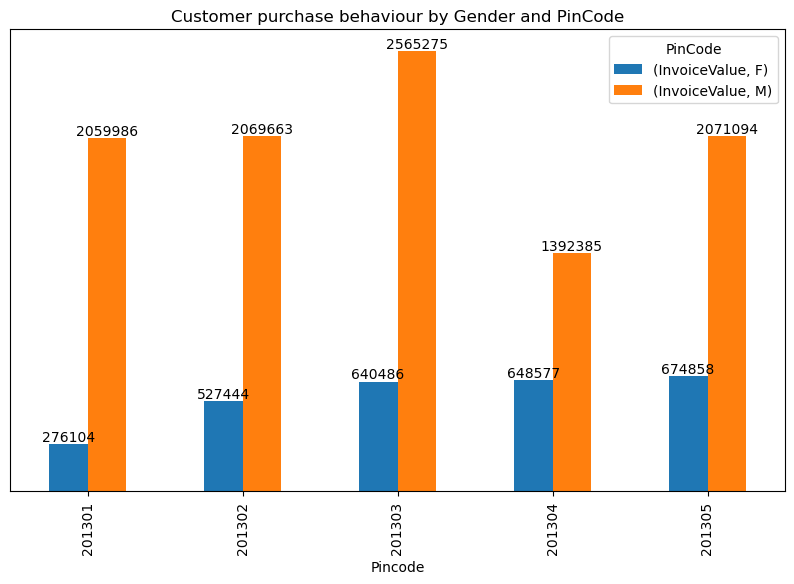

In [336]:
#Do we have different patterns in buying behaviour between different customer gender?
customer_buying_pattern = master.pivot_table(index='PinCode', 
                                            columns='Gender',
                                            values=['InvoiceValue'], 
                                            aggfunc={'InvoiceValue': 'sum'}, 
                                            fill_value=0)

plt.rcParams['figure.figsize'] = [10, 6] 

# Create a bar plot
ax = customer_buying_pattern.plot(kind='bar', stacked=False)

# Customize the plot
ax.set_xlabel('Pincode')
ax.set_title('Customer purchase behaviour by Gender and PinCode')
ax.legend(title='PinCode')

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Set plot labels and title
ax.set_xlabel
ax.set_yticks([])

# Show the plot
plt.show()

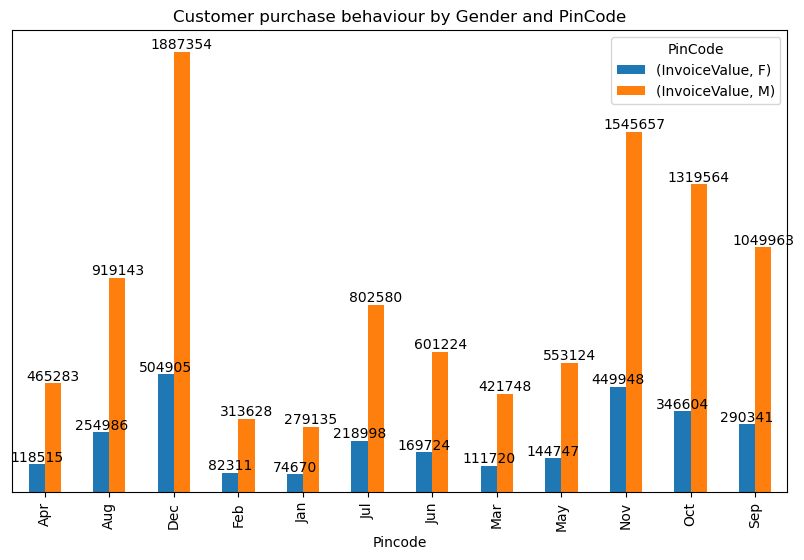

In [337]:
#Do we have different patterns in buying behaviour between different customer gender?
customer_buying_pattern = master.pivot_table(index='Month', 
                                            columns='Gender',
                                            values=['InvoiceValue'], 
                                            aggfunc={'InvoiceValue': 'sum'}, 
                                            fill_value=0)

plt.rcParams['figure.figsize'] = [10, 6] 

# Create a bar plot
ax = customer_buying_pattern.plot(kind='bar', stacked=False)

# Customize the plot
ax.set_xlabel('Pincode')
ax.set_title('Customer purchase behaviour by Gender and PinCode')
ax.legend(title='PinCode')

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Set plot labels and title
ax.set_xlabel
ax.set_yticks([])

# Show the plot
plt.show()

In [338]:
# Which Pincode have least variation in the sale?
sales_variation_data = master.groupby(['PinCode']).aggregate(sales_variation = ('InvoiceValue', np.var)).reset_index()
sales_variation_data.sort_values(by = 'sales_variation')

,PinCode,sales_variation
3,201304,17534.146050
0,201301,17889.645471
1,201302,18018.339960
2,201303,18091.106529
4,201305,18221.203771


In [339]:
# Which are top 10 revenue generating customers per month?
customer_buying_pattern = master.groupby(['Month', 'CustomerID']).aggregate(Sale = ('InvoiceValue', np.sum)).reset_index()
customer_buying_pattern.sort_values(by = ['Month', 'Sale'], ascending=[True, False], inplace= True)

import pandas as pd

# Define a function to extract the top 10 rows from a group
def extract_top_10(group):
    return group.nlargest(10, 'Sale')

# Group by the 'group' column and apply the function to each group
top_10_per_group = customer_buying_pattern.groupby('Month', group_keys=False, sort=False).apply(extract_top_10)

# Reset the index if needed
top_10_per_group = top_10_per_group.reset_index(drop=True)

In [340]:
# Which are top 5 customers which are generating maximum revenue pincodes?
customer_buying_pattern = master.groupby(['PinCode', 'CustomerID']).aggregate(Sale = ('InvoiceValue', np.sum)).reset_index()
customer_buying_pattern.sort_values(by = ['PinCode', 'Sale'], ascending=[True, False], inplace= True)

import pandas as pd

# Define a function to extract the top 10 rows from a group
def extract_top_10(group):
    return group.nlargest(5, 'Sale')

# Group by the 'group' column and apply the function to each group
top_5_per_group = customer_buying_pattern.groupby('PinCode', group_keys=False, sort=False).apply(extract_top_10)

# Reset the index if needed
top_5_per_group = top_10_per_group.reset_index(drop=True)

In [341]:
# Consider five year age window as age group, is there any difference in sales? consider gender as two different populations.
# display(master.Age.min(), master.Age.max())

def customer_group(cust_age):
    if 20 <= cust_age <= 25:
        return 'Bucket 1' 
    elif 26 <= cust_age <= 30:
        return 'Bucket 2'
    elif 31 <= cust_age <= 35:
        return 'Bucket 3' 
    elif 36 <= cust_age <= 40:
        return 'Bucket 4' 
    elif 41 <= cust_age <= 45:
        return 'Bucket 5'
    elif 46 <= cust_age <= 50:
        return 'Bucket 6' 
    elif 51 <= cust_age <= 55:
        return 'Bucket 7' 
    else:
        return 'Bucket 8'


# Group Creation
master['Customer_Bucket'] = master.Age.apply(lambda x : customer_group(x))
# Group Validation
Bucket_validation = master.groupby('Customer_Bucket').aggregate(Minimum_Age = ('Age', np.min), Maximum_Age = ('Age', np.max)).reset_index()
Bucket_validation

,Customer_Bucket,Minimum_Age,Maximum_Age
0,Bucket 1,20,24
1,Bucket 2,26,30
2,Bucket 3,31,35
3,Bucket 4,36,40
4,Bucket 5,41,45
5,Bucket 6,46,50
6,Bucket 7,51,55
7,Bucket 8,56,60


In [342]:
from scipy.stats import f_oneway

bucket_1_customer_sales = master[master['Customer_Bucket'] == 'Bucket 1'].InvoiceValue.to_list()
bucket_2_customer_sales = master[master['Customer_Bucket'] == 'Bucket 2'].InvoiceValue.to_list()
bucket_3_customer_sales = master[master['Customer_Bucket'] == 'Bucket 3'].InvoiceValue.to_list()
bucket_4_customer_sales = master[master['Customer_Bucket'] == 'Bucket 4'].InvoiceValue.to_list()
bucket_5_customer_sales = master[master['Customer_Bucket'] == 'Bucket 5'].InvoiceValue.to_list()
bucket_6_customer_sales = master[master['Customer_Bucket'] == 'Bucket 6'].InvoiceValue.to_list()
bucket_7_customer_sales = master[master['Customer_Bucket'] == 'Bucket 7'].InvoiceValue.to_list()

# Conduct the one-way ANOVA
f_statistic, p_value = f_oneway(bucket_1_customer_sales, 
                                bucket_2_customer_sales, 
                                bucket_3_customer_sales, 
                                bucket_4_customer_sales, 
                                bucket_5_customer_sales, 
                                bucket_6_customer_sales, 
                                bucket_7_customer_sales)


print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("There are significant differences between at least one pair of groups.")
else:
    print("There are no significant differences between the groups.")




F-Statistic: 0.7720401160599576
P-Value: 0.5917713544332039
There are no significant differences between the groups.
